In [1]:
!pip install pafy youtube-dl moviepy

You should consider upgrading via the 'C:\Users\setu925\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for moviepy, since package 'wheel' is not installed.
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.0
    Uninstalling decorator-5.1.0:
      Successfully uninstalled decorator-5.1.0
    Running setup.py install for moviepy: started
    Running setup.py install for moviepy: finished with status 'done'


In [2]:
!C:\Users\setu925\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [7]:
#import statements
import os
import math
import pafy
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import cv2

from moviepy.editor import *
from collections import deque

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [9]:
#Setting constant seed

seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [10]:
!DIR

 Volume in drive K is New Volume
 Volume Serial Number is BAAF-2B2E

 Directory of K:\Code\Research\RIT\Activity_Recognition\HAR-Human_Activity_Recognition-

07/20/2022  09:19 AM    <DIR>          .
07/20/2022  09:19 AM    <DIR>          ..
07/20/2022  08:45 AM    <DIR>          .ipynb_checkpoints
07/20/2022  08:45 AM    <DIR>          BIT-Interaction
07/20/2022  09:19 AM             6,248 HAR_Human_Activity_Recognition.ipynb
07/20/2022  08:43 AM            11,558 LICENSE
07/20/2022  08:43 AM                33 README.md
01/27/2015  11:17 PM    <DIR>          videos
               3 File(s)         17,839 bytes
               5 Dir(s)  66,728,525,824 bytes free


['bend', 'box', 'handshake', 'hifive', 'hug', 'kick', 'pat', 'push']


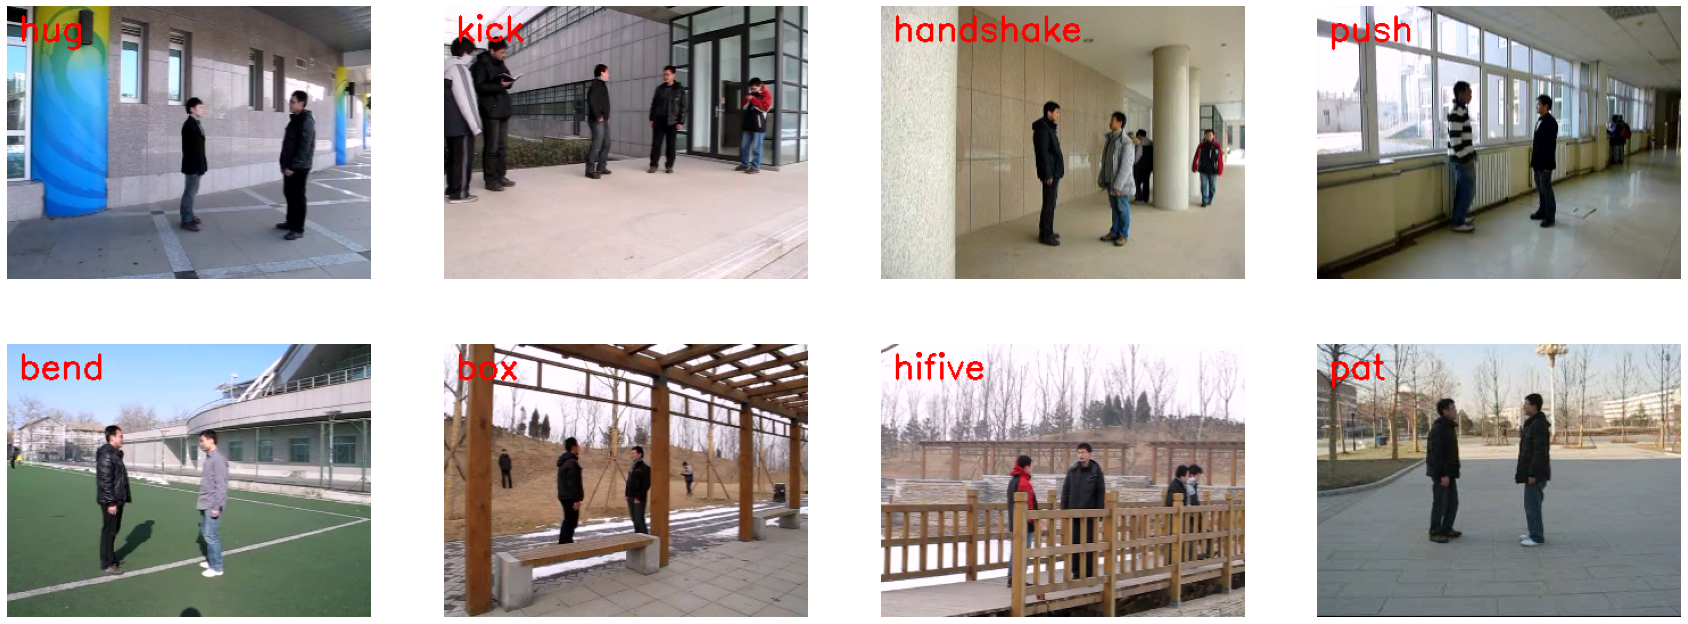

In [19]:
#Visualizing the data

plt.figure(figsize=(30,30))
all_class_names = os.listdir('videos')
all_class_names.remove('.DS_Store')

random_range = random.sample(range(len(all_class_names)),8)
for counter, random_index in enumerate(random_range,1):
    selected_class_name = all_class_names[random_index]
    video_files_names_list = os.listdir(f'videos/{selected_class_name}')
    selected_video_file = random.choice(video_files_names_list)
    video_reader = cv2.VideoCapture(f'videos/{selected_class_name}/{selected_video_file}')
    
    _, bgr_frame = video_reader.read()
    video_reader.release()
    
    rgb_frame = cv2.cvtColor(bgr_frame,cv2.COLOR_BGR2RGB)
    
    cv2.putText(rgb_frame,selected_class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
    
    plt.subplot(5,4,counter)
    plt.imshow(rgb_frame)
    plt.axis('off')
    
#print(video_files_names_list)
print(all_class_names)

In [23]:
#Data

image_height, image_width = 64,64
max_imeges_per_class = 8000

data_dir = "videos"

classes_list = all_class_names[3:]
print(classes_list)

model_output_size = len(classes_list)

['hifive', 'hug', 'kick', 'pat', 'push']


In [ ]:
def frames_extraction(video_path):
    frames_list = []
    
    while True:
        success, frame = cv2.VideoCapture(video_path)
        if not success:
            break
        
        resized_frame = cv2.resize(frame,(image_height,image_width))
        
        normalized_frame = resized_frame/255
        
        frames_list.append(normalized_frame)
    video_reader.release()
    return frames_list